In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Dependent Variable Choices:
# •	 GDP Growth Rate https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG
# •	 Per Capita GDP (PPP) https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
# •	 Democracy Index https://ourworldindata.org/grapher/democracy-index-eiu 
# •	 Liberal Democracy Index https://ourworldindata.org/grapher/liberal-democracy-index 
# Independent variables:
# •	Size of Government
# •	Legal System and Property Rights
# •	Sound Money
# •	Freedom to Trade Internationally
# •	 Regulations 


# List of Independent Variables

In [3]:
# read indendent variables xlsx file
independent_variables = pd.read_excel(r"\Users\harsh\OneDrive - mnit.ac.in\Desktop\Economic Freedom/Economic_Freedom.xlsx")

# head
independent_variables.head()

,Year,ISO_Code_3,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2020,ALB,UM,Albania,7.817077,5.260351,9.788269,8.222499,7.112958
1,2020,DZA,LM,Algeria,4.409943,4.131760,7.630287,3.639507,5.778953
2,2020,AGO,LM,Angola,8.133385,3.705161,6.087996,5.373190,6.227545
3,2020,ARG,UM,Argentina,6.483768,4.796454,4.516018,3.086907,5.490538
4,2020,ARM,UM,Armenia,7.975292,6.236215,9.553009,7.692708,7.756333


In [4]:
# there four dependent variables, load all csv in different dataframes
# 1. GDP Growth Rate
gdp_growth_rate = pd.read_csv(r"\Users\harsh\OneDrive - mnit.ac.in\Desktop/Economic Freedom/dependent/API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_5871698/API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_5871698.csv")
# 2. Per Capita GDP (PPP)
per_capita_gdp = pd.read_csv(r"\Users\harsh\OneDrive - mnit.ac.in\Desktop/Economic Freedom/dependent/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_5871590/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_5871590.csv")
# 3. Democracy Index
democracy_index = pd.read_csv(r"\Users\harsh\OneDrive - mnit.ac.in\Desktop/Economic Freedom/dependent/democracy-index-eiu.csv")
# 4. liberal democracy index
liberal_democracy_index = pd.read_csv(r"\Users\harsh\OneDrive - mnit.ac.in\Desktop/Economic Freedom/dependent/liberal-democracy-index.csv")

In [5]:
# head of all dependent variables
gdp_growth_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.709567,2.885166,1.515938,4.917139,4.738330,0.181216,-18.698324,17.225300,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-2.342974,5.093992,2.330796,1.724021,2.436215,...,1.186759,0.166840,-0.490259,-0.105886,-0.169822,-0.587557,-5.421662,1.683557,0.842507,NaN
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.929194,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,-0.255511,1.592942,4.978710,3.130231,1.798761,...,3.093635,0.026016,-2.519274,-0.382691,0.140162,0.563580,-3.453124,1.372160,1.192668,NaN
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030729,-2.642975,-6.011891,-3.630695,-4.676670,-4.017114,-8.672432,-1.954598,-0.096755,NaN


In [6]:
# head of gdp per capita
per_capita_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36846.848285,37343.912963,37583.840323,38865.188195,41685.363318,42510.065590,35012.391466,42887.374913,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3471.665125,3498.864893,3592.092621,3635.259642,3724.994882,3778.210236,3624.820674,3858.004651,4169.019532,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.829568,2128.125938,2023.834656,2096.093111,2110.239384,2168.133765,2078.595086,1673.964059,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4144.259662,4077.321424,4003.756559,4051.271199,4161.782756,4267.050522,4179.632366,4429.952133,4798.434519,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8123.048065,7274.090475,7027.146634,7216.061373,7043.955360,6882.279123,6367.437317,6523.463613,6973.696299,NaN


In [7]:
# head of democracy index
democracy_index.head(10)
# print no of rows and columns
# print(democracy_index.shape)

,Entity,Code,Year,democracy_eiu
0,Afghanistan,AFG,2006,3.06
1,Afghanistan,AFG,2008,3.02
2,Afghanistan,AFG,2010,2.48
3,Afghanistan,AFG,2011,2.48
4,Afghanistan,AFG,2012,2.48
5,Afghanistan,AFG,2013,2.48
6,Afghanistan,AFG,2014,2.77
7,Afghanistan,AFG,2015,2.77
8,Afghanistan,AFG,2016,2.55
9,Afghanistan,AFG,2017,2.55


# Choosen Dependent variable

In [8]:
# head of liberal democracy index
liberal_democracy_index.head()

,Entity,Code,Year,libdem_vdem_owid,libdem_vdem_low_owid,libdem_vdem_high_owid
0,Afghanistan,AFG,1789,0.029,0.015,0.04
1,Afghanistan,AFG,1790,0.029,0.015,0.04
2,Afghanistan,AFG,1791,0.029,0.015,0.04
3,Afghanistan,AFG,1792,0.029,0.015,0.04
4,Afghanistan,AFG,1793,0.029,0.015,0.04


In [9]:
liberal_democracy_index.shape

(31246, 6)

## Liberal Democracy Index for the Year 2019

In [10]:
# selesct gdp per capita for year 2019 
liberal_democracy_index_2019 = liberal_democracy_index[liberal_democracy_index['Year'] == 2019][['Entity', 'Code','libdem_vdem_owid']]


In [11]:
liberal_democracy_index_2019.head()

,Entity,Code,libdem_vdem_owid
230,Afghanistan,AFG,0.188000
464,Africa,NaN,0.292464
573,Albania,ALB,0.410000
696,Algeria,DZA,0.149000
819,Angola,AGO,0.181000


In [12]:
# get stats of gdp growth rate
liberal_democracy_index_2019.describe()

,libdem_vdem_owid
count,186.000000
mean,0.406032
std,0.256818
min,0.009000
25%,0.178750
50%,0.378000
75%,0.614750
max,0.888000


In [13]:
independent_variables.head()

,Year,ISO_Code_3,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2020,ALB,UM,Albania,7.817077,5.260351,9.788269,8.222499,7.112958
1,2020,DZA,LM,Algeria,4.409943,4.131760,7.630287,3.639507,5.778953
2,2020,AGO,LM,Angola,8.133385,3.705161,6.087996,5.373190,6.227545
3,2020,ARG,UM,Argentina,6.483768,4.796454,4.516018,3.086907,5.490538
4,2020,ARM,UM,Armenia,7.975292,6.236215,9.553009,7.692708,7.756333


In [14]:
# filter independent variables for year 2019
# year is a column name
independent_variables_2019 = independent_variables[independent_variables['Year'] == 2019]


In [15]:
independent_variables_2019.head()

,Year,ISO_Code_3,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
165,2019,ALB,UM,Albania,7.914268,5.258761,9.826940,8.230911,7.700060
166,2019,DZA,LM,Algeria,4.493283,4.142183,7.287544,2.552219,5.840058
167,2019,AGO,LM,Angola,8.052308,3.667991,4.667936,5.406168,5.975078
168,2019,ARG,UM,Argentina,6.547787,4.797545,3.880439,5.966232,5.993349
169,2019,ARM,UM,Armenia,7.770128,6.250483,9.519780,8.524505,7.819692


In [16]:
# save size of government, legal system and property rights, sound money, freedom to trade internationally, regulations in a dataframe
independent_variables_2019_imp = independent_variables_2019[[ 'Size of Government', 'Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally', 'Regulation']]

## Removing Duplicates Values

In [17]:
# Check for duplicate values in the 'Code' column of democracy_index_2019
duplicate_codes = liberal_democracy_index_2019[liberal_democracy_index_2019['Code'].duplicated()]

# Print the duplicate codes, if any
print(duplicate_codes)

# If duplicates exist, resolve them
# For example, you can choose to aggregate or merge the duplicate entries


                    Entity Code  libdem_vdem_owid
1392                  Asia  NaN          0.264347
9364                Europe  NaN          0.645683
19873        North America  NaN          0.469800
20752              Oceania  NaN          0.562000
21145       Palestine/Gaza  NaN          0.079000
21203  Palestine/West Bank  NaN          0.202000
25570        South America  NaN          0.512333


In [18]:
# drop rows with NaN values
liberal_democracy_index_2019.dropna(inplace=True)

In [19]:
# add a column of democracy index 2019 in independent variables dataframe based country code
independent_variables_2019['Liberal Democracy Index'] = independent_variables_2019['ISO_Code_3'].map(liberal_democracy_index_2019.set_index('Code')['libdem_vdem_owid'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_11196\2062771553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_variables_2019['Liberal Democracy Index'] = independent_variables_2019['ISO_Code_3'].map(liberal_democracy_index_2019.set_index('Code')['libdem_vdem_owid'])


In [20]:
# drop rows with NaN values
independent_variables_2019.dropna(inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_11196\4268654932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_variables_2019.dropna(inplace=True)


# Data Summary

In [21]:
independent_variables_2019

,Year,ISO_Code_3,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Liberal Democracy Index
165,2019,ALB,UM,Albania,7.914268,5.258761,9.826940,8.230911,7.700060,0.410
166,2019,DZA,LM,Algeria,4.493283,4.142183,7.287544,2.552219,5.840058,0.149
167,2019,AGO,LM,Angola,8.052308,3.667991,4.667936,5.406168,5.975078,0.181
168,2019,ARG,UM,Argentina,6.547787,4.797545,3.880439,5.966232,5.993349,0.607
169,2019,ARM,UM,Armenia,7.770128,6.250483,9.519780,8.524505,7.819692,0.632
...,...,...,...,...,...,...,...,...,...,...
325,2019,VEN,UM,"Venezuela, RB",4.338019,2.441900,0.944935,4.090400,2.517155,0.069
326,2019,VNM,LM,Vietnam,6.955223,4.983864,6.892635,6.183881,6.983588,0.108
327,2019,YEM,L,"Yemen, Rep.",8.267794,2.744222,8.726899,5.377539,3.502867,0.042
328,2019,ZMB,LM,Zambia,6.578045,5.014693,9.028393,7.691995,6.454841,0.278


## Scatter Plot Between Size of Government and Liberal Democracy Index

<Axes: xlabel='Size of Government', ylabel='Liberal Democracy Index'>

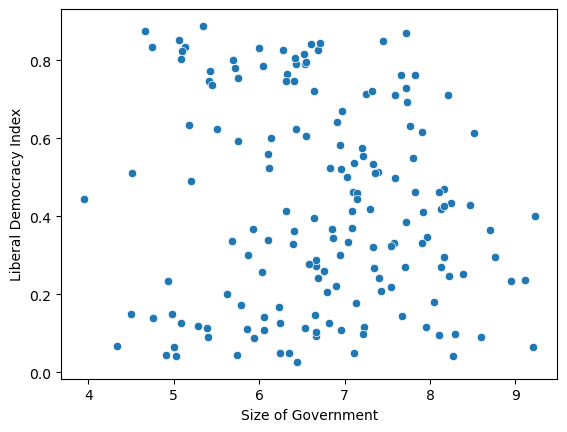

In [22]:
import seaborn as sns
sns.scatterplot(x=independent_variables_2019['Size of Government'],y=independent_variables_2019['Liberal Democracy Index'])

## Scatter Plot Between Legal System & Property Rights and Liberal Democracy Index

<Axes: xlabel='Legal System & Property Rights', ylabel='Liberal Democracy Index'>

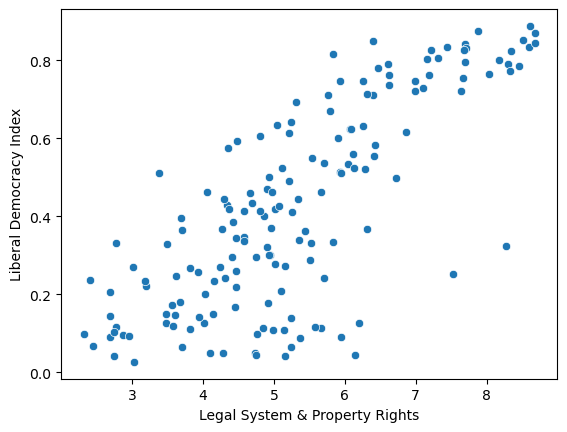

In [23]:
import seaborn as sns
sns.scatterplot(x=independent_variables_2019['Legal System & Property Rights'],y=independent_variables_2019['Liberal Democracy Index'])

## Scatter Plot Between Sound Money and Liberal Democracy Index

<Axes: xlabel='Sound Money', ylabel='Liberal Democracy Index'>

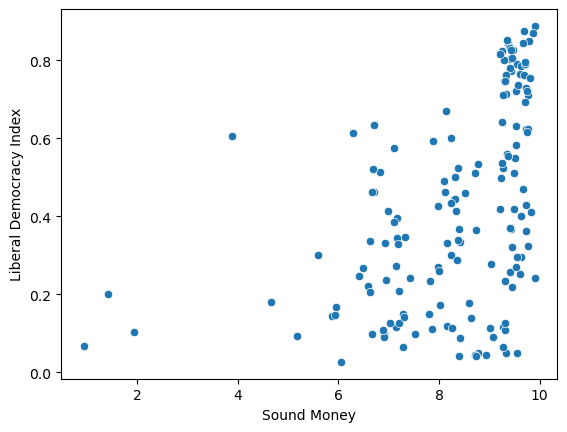

In [24]:
import seaborn as sns
sns.scatterplot(x=independent_variables_2019['Sound Money'],y=independent_variables_2019['Liberal Democracy Index'])

## Scatter Plot Between Freedom to trade internationally and Freedom to trade internationally

<Axes: xlabel='Freedom to trade internationally', ylabel='Liberal Democracy Index'>

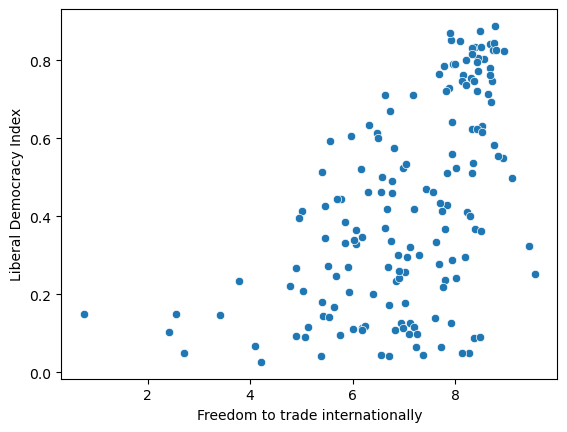

In [25]:
import seaborn as sns
sns.scatterplot(x=independent_variables_2019['Freedom to trade internationally'],y=independent_variables_2019['Liberal Democracy Index'])

## Scatter Plot Between Regulation and Liberal Democracy Index

<Axes: xlabel='Regulation', ylabel='Liberal Democracy Index'>

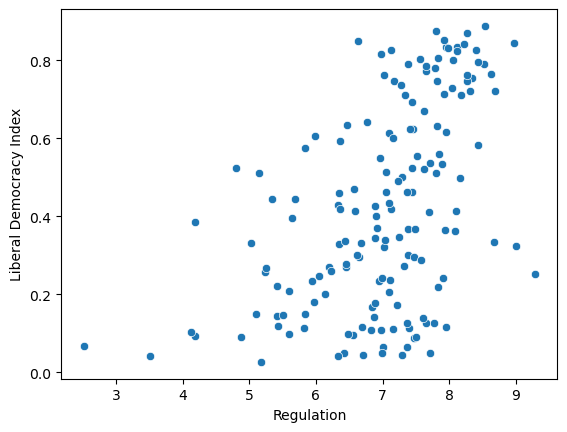

In [26]:
import seaborn as sns
sns.scatterplot(x=independent_variables_2019['Regulation'],y=independent_variables_2019['Liberal Democracy Index'])

# Data Cleaning
## Removing Outlier using Percentile method

In [27]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named independent_variables_2019
# Replace 'your_dataset.csv' with your dataset file or provide the DataFrame directly

# Calculate the IQR for each column
Q1 = independent_variables_2019.quantile(0.25)
Q3 = independent_variables_2019.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Create a boolean mask to identify outliers
outliers_mask = ((independent_variables_2019 < (Q1 - threshold * IQR)) | (independent_variables_2019 > (Q3 + threshold * IQR))).any(axis=1)

# Create a new DataFrame with only the non-outlier rows
independent_variables_2019_cleaned = independent_variables_2019[~outliers_mask].copy()




C:\Users\harsh\AppData\Local\Temp\ipykernel_11196\2861422465.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = independent_variables_2019.quantile(0.25)
C:\Users\harsh\AppData\Local\Temp\ipykernel_11196\2861422465.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = independent_variables_2019.quantile(0.75)
C:\Users\harsh\AppData\Local\Temp\ipykernel_11196\2861422465.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((independent_variables

# Descriptive Statistics

In [28]:
# Inspect the cleaned data
print(independent_variables_2019_cleaned.head())
print(independent_variables_2019_cleaned.describe())

# Optionally, save the cleaned data to a new CSV file
independent_variables_2019_cleaned.to_csv('cleaned_dataset.csv', index=False)  # Change the file name as needed

     Year ISO_Code_3  \
165  2019        ALB   
167  2019        AGO   
169  2019        ARM   
170  2019        AUS   
171  2019        AUT   

    World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
165                                                 UM                                                                                     
167                                                 LM                                                                                     
169                                                 UM                                                                                     
170                                                  H                                                                                     
171                                                  H                                                                                     

     Countries

In [29]:
outliers_df = independent_variables_2019[outliers_mask]
# Inspect the outlier values
print("Outlier Values:")
print(outliers_df)

Outlier Values:
     Year ISO_Code_3  \
166  2019        DZA   
168  2019        ARG   
189  2019        BDI   
201  2019        COG   
254  2019        LBY   
297  2019        SLE   
305  2019        SDN   
325  2019        VEN   
327  2019        YEM   
329  2019        ZWE   

    World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
166                                                 LM                                                                                     
168                                                 UM                                                                                     
189                                                  L                                                                                     
201                                                 LM                                                                                     
254                

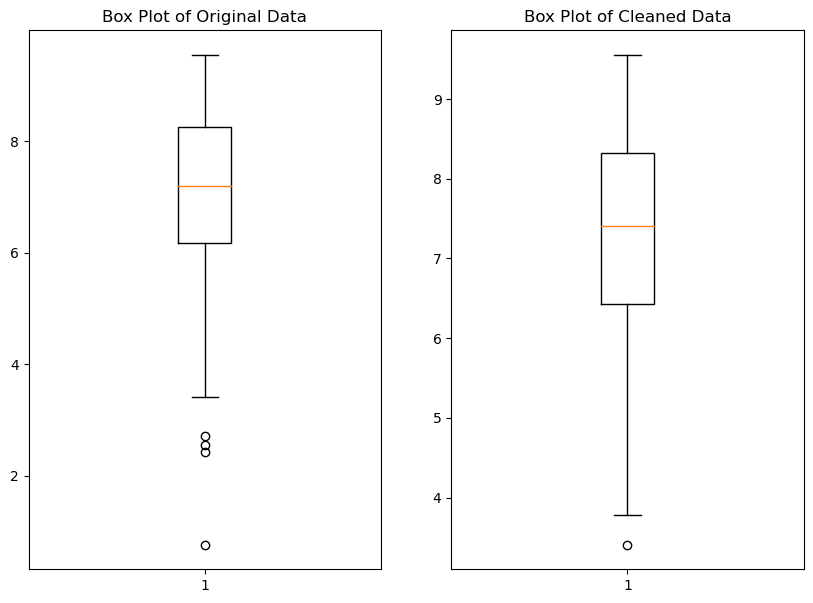

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.boxplot(independent_variables_2019['Freedom to trade internationally'])
plt.title('Box Plot of Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(independent_variables_2019_cleaned['Freedom to trade internationally'])
plt.title('Box Plot of Cleaned Data')

plt.show()


# Scatter Plot

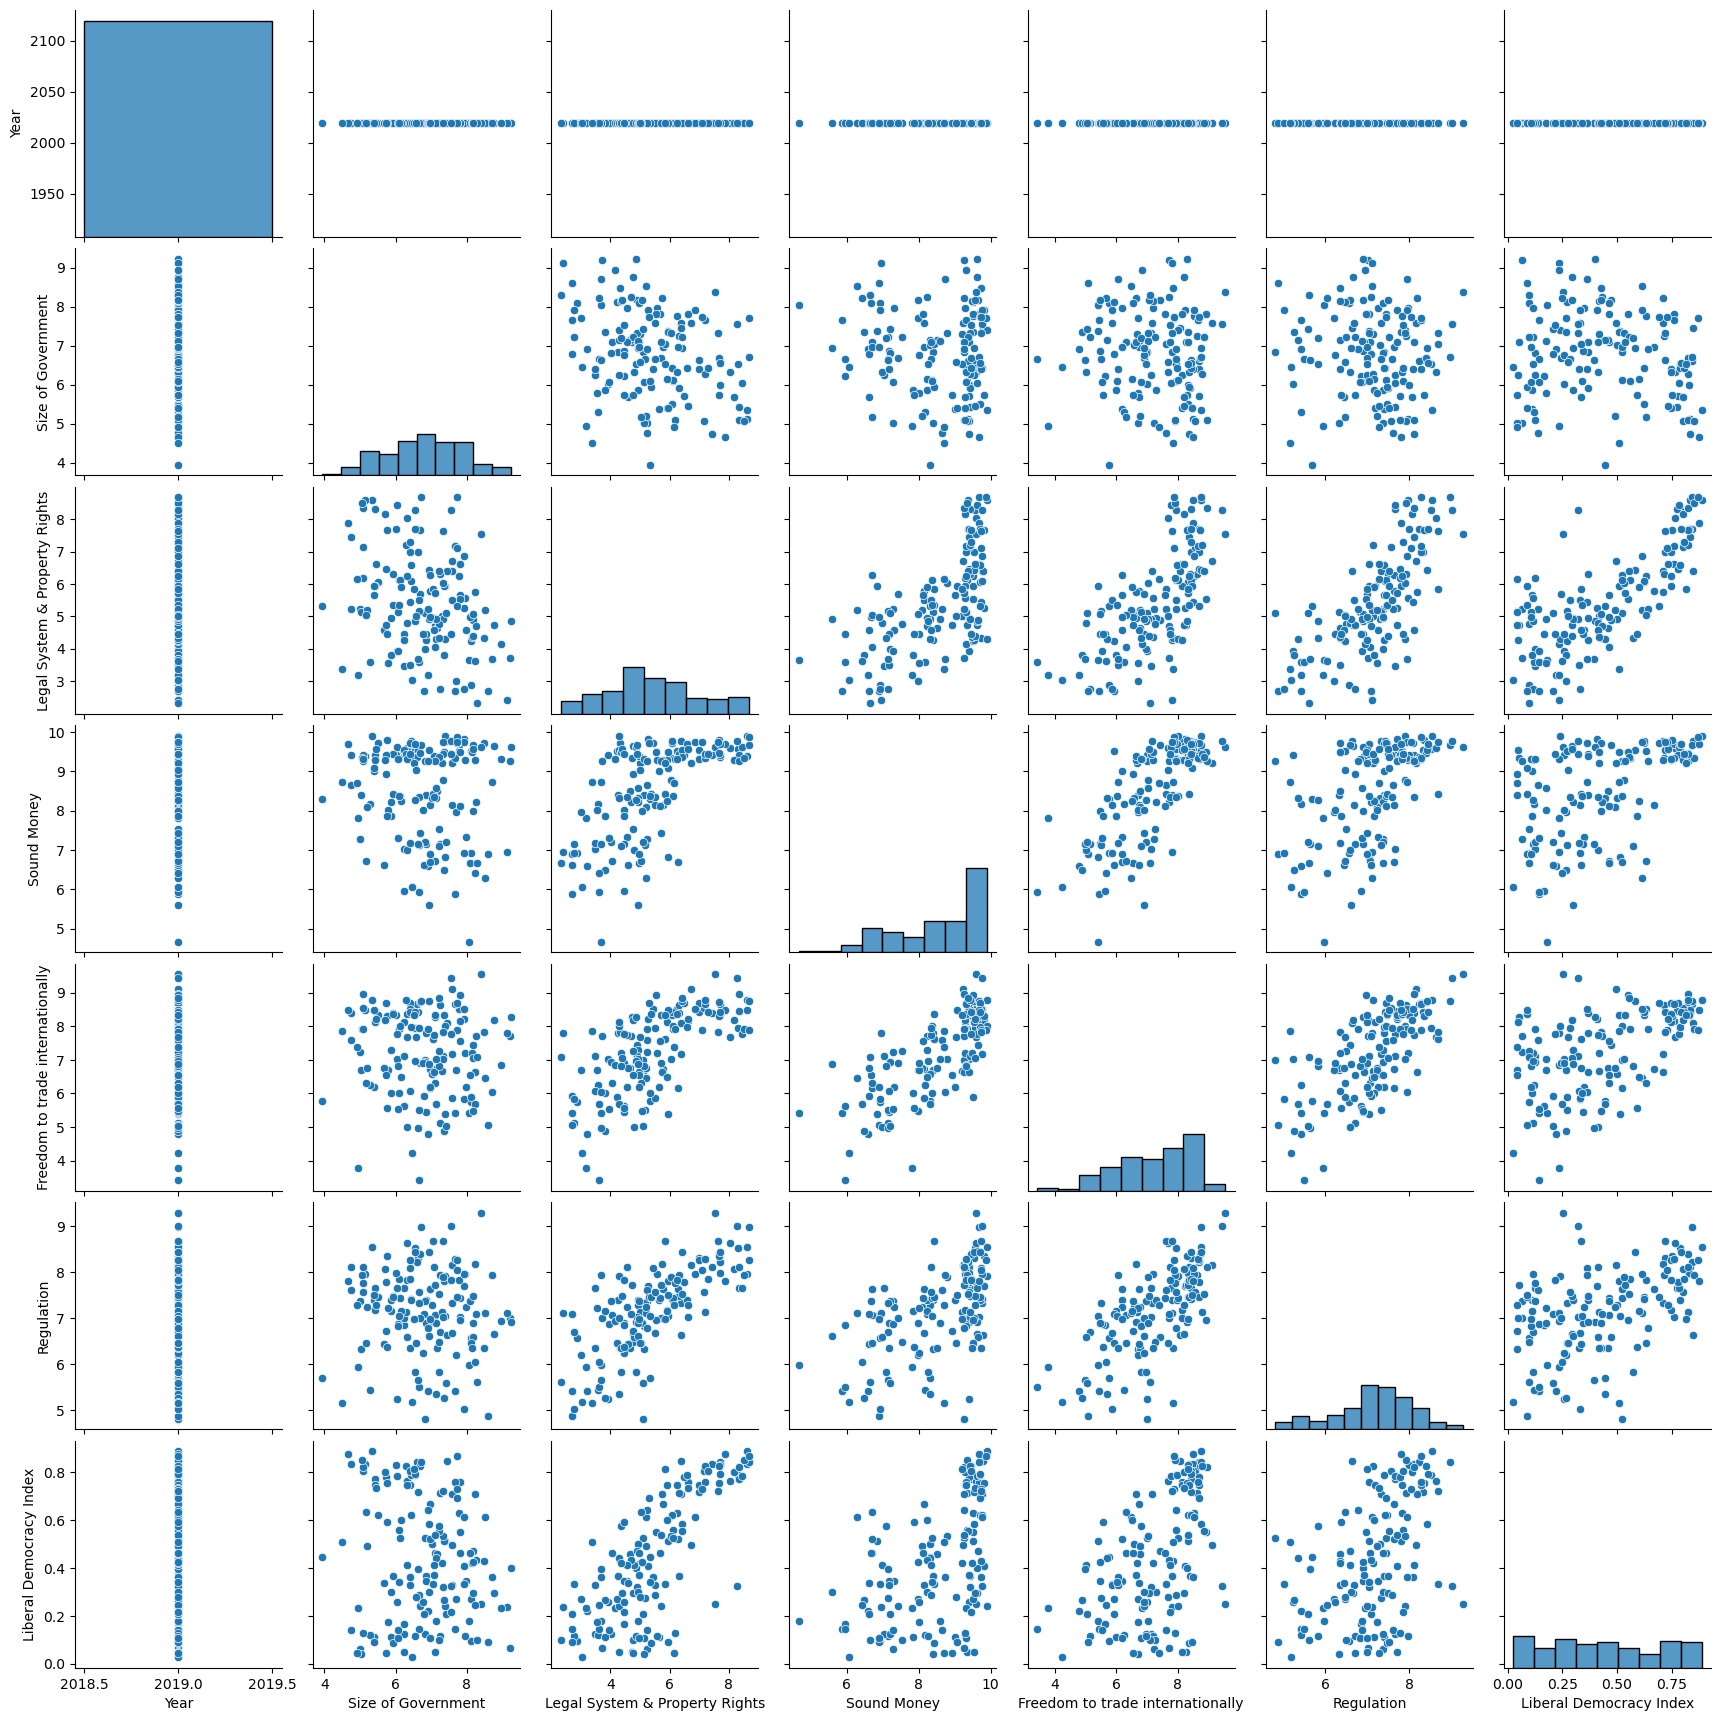

In [31]:
# plot seaborn pairplot
import seaborn as sns
sns.pairplot(independent_variables_2019_cleaned)


# Correlation Matrix

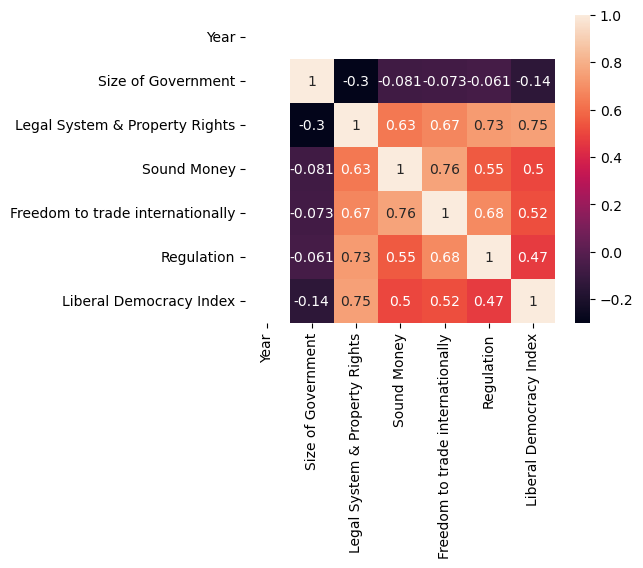

In [32]:
# get corelation matrix for size of government, legal system and property rights, sound money, freedom to trade internationally, regulations, gdp per capita
# get numerical columns
independent_variables_2019_num = independent_variables_2019_cleaned.select_dtypes(include=[np.number])
# get corelation matrix
corr_matrix = independent_variables_2019_num.corr()
# Define the size of the heatmap (adjust the width and height as needed)
heatmap_size = (5, 4)
# Plot the heatmap with the specified size
plt.figure(figsize=heatmap_size)
# plot heatmap of corelation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Model 1

In [33]:
# import statsmodels
import statsmodels.api as sm
# add constant to independent variables
X = sm.add_constant(independent_variables_2019_cleaned[[ 'Legal System & Property Rights']])
# dependent variable
y = independent_variables_2019_cleaned['Liberal Democracy Index']
# fit linear regression model
model = sm.OLS(y, X).fit()
# print model summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     Liberal Democracy Index   R-squared:                       0.560
Model:                                 OLS   Adj. R-squared:                  0.557
Method:                      Least Squares   F-statistic:                     191.0
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           1.52e-28
Time:                             18:16:12   Log-Likelihood:                 54.596
No. Observations:                      152   AIC:                            -105.2
Df Residuals:                          150   BIC:                            -99.14
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [34]:
# print equation of model
# y = intercept + coefficient1 * Regulation + coefficient2 * Legal System & Property Rights
#print('y = ', model.params[0], ' + ', model.params[1], ' * Regulation + ', model.params[2], ' * Legal System & Property Rights')
print('y = ', model.params[0], ' + ', model.params[1], ' * Legal System & Property Rights ')

y =  -0.23663283043758548  +  0.12450008251632616  * Legal System & Property Rights 


# Model 2

In [36]:
# import statsmodels
import statsmodels.api as sm
# add constant to independent variables
X = sm.add_constant(independent_variables_2019_cleaned[['Freedom to trade internationally', 'Legal System & Property Rights']])
# dependent variable
y = independent_variables_2019_cleaned['Liberal Democracy Index']
# fit linear regression model
model = sm.OLS(y, X).fit()
# print model summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     Liberal Democracy Index   R-squared:                       0.561
Model:                                 OLS   Adj. R-squared:                  0.555
Method:                      Least Squares   F-statistic:                     95.06
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           2.46e-27
Time:                             18:16:13   Log-Likelihood:                 54.674
No. Observations:                      152   AIC:                            -103.3
Df Residuals:                          149   BIC:                            -94.28
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [37]:
# print equation of model
# y = intercept + coefficient1 * Regulation + coefficient2 * Legal System & Property Rights
#print('y = ', model.params[0], ' + ', model.params[1], ' * Regulation + ', model.params[2], ' * Legal System & Property Rights')
print('y = ', model.params[0], ' + ', model.params[1], ' * Freedom to trade internationally +', model.params[2], '* Legal System & Property Rights')

y =  -0.26205096224289004  +  0.005903985724699986  * Freedom to trade internationally + 0.12130418933256358 * Legal System & Property Rights


# VIF for Model 2

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your design matrix (including a constant term)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [39]:
print(vif)

                           Variable        VIF
0                             const  35.777090
1  Freedom to trade internationally   1.824612
2    Legal System & Property Rights   1.824612


# Model 3

In [40]:
# import statsmodels
import statsmodels.api as sm
# add constant to independent variables
X = sm.add_constant(independent_variables_2019_cleaned[[ 'Legal System & Property Rights','Regulation']])
# dependent variable
y = independent_variables_2019_cleaned['Liberal Democracy Index']
# fit linear regression model
model = sm.OLS(y, X).fit()
# print model summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     Liberal Democracy Index   R-squared:                       0.574
Model:                                 OLS   Adj. R-squared:                  0.568
Method:                      Least Squares   F-statistic:                     100.2
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           2.64e-28
Time:                             18:16:13   Log-Likelihood:                 56.949
No. Observations:                      152   AIC:                            -107.9
Df Residuals:                          149   BIC:                            -98.83
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# VIF for Model 3

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your design matrix (including a constant term)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                         Variable        VIF
0                           const  70.937374
1  Legal System & Property Rights   2.147230
2                      Regulation   2.147230


# Model 4

In [42]:
# import statsmodels
import statsmodels.api as sm
# add constant to independent variables
X = sm.add_constant(independent_variables_2019_cleaned[['Legal System & Property Rights','Regulation','Size of Government']])
# dependent variable
y = independent_variables_2019_cleaned['Liberal Democracy Index']
# fit linear regression model
model = sm.OLS(y, X).fit()
# print model summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     Liberal Democracy Index   R-squared:                       0.587
Model:                                 OLS   Adj. R-squared:                  0.579
Method:                      Least Squares   F-statistic:                     70.11
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           2.86e-28
Time:                             18:16:13   Log-Likelihood:                 59.376
No. Observations:                      152   AIC:                            -110.8
Df Residuals:                          148   BIC:                            -98.66
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

## OLS Equation For Model 4 which is our final model

In [43]:
# print equation of model
#print('y = ', model.params[0], ' + ', model.params[1], ' * Regulation + ', model.params[2], ' * Legal System & Property Rights + ', model.params[3], ' * Freedom to trade internationally')
print('y = ', model.params[0], ' + ', model.params[1], model.params[1], ' * Legal System & Property Rights +  ', model.params[2], '* Regulation +', model.params[3], '* Size of Government') 

y =  -0.18942480017641355  +  0.15651376435372194 0.15651376435372194  * Legal System & Property Rights +   -0.058565816911919893 * Regulation + 0.029183577127467192 * Size of Government


# Multivariant Regression Line Plot

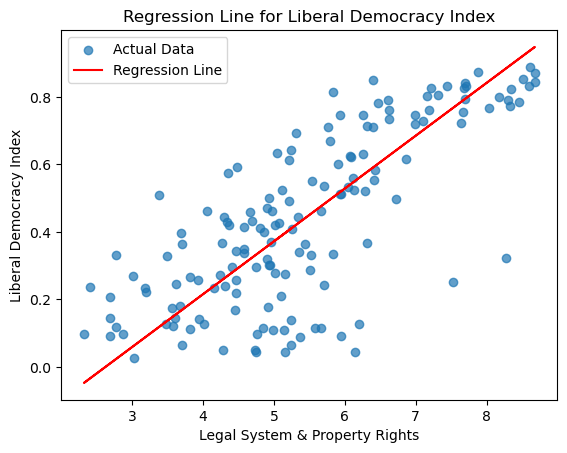

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients from your regression model
intercept = model.params[0]

b2 = model.params[1]
b3 = model.params[2]
b4 = model.params[3]


# Calculate predicted values based on the multivariable regression equation
predicted_values = (
    intercept +  # Use the mean value for other variables
    b2 * independent_variables_2019_cleaned['Legal System & Property Rights'] +
    b3 * independent_variables_2019_cleaned['Regulation'].mean() +
    b4 * independent_variables_2019_cleaned['Size of Government'].mean()
)

# Plot the regression line
plt.scatter(independent_variables_2019_cleaned['Legal System & Property Rights'], y, label='Actual Data', alpha=0.7)
plt.plot(independent_variables_2019_cleaned['Legal System & Property Rights'], predicted_values, color='red', label='Regression Line')

plt.xlabel('Legal System & Property Rights')
plt.ylabel('Liberal Democracy Index')
plt.legend()
plt.title('Regression Line for Liberal Democracy Index')
plt.show()


# Residual Plot

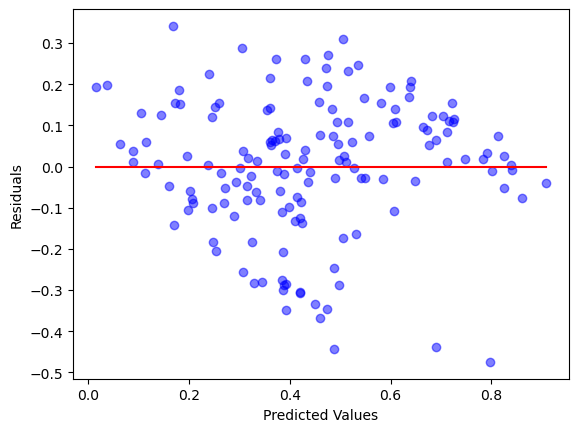

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted values and residuals
predicted_values = model.predict(X)
residuals = model.resid

# Scatter plot of residuals vs. predicted values
plt.scatter(predicted_values, residuals, c='b', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Add a regression line to the plot
plt.plot(np.unique(predicted_values), np.poly1d(np.polyfit(predicted_values, residuals, 1))(np.unique(predicted_values)), color='r')

plt.show()


In [46]:
# Count the number of points above and below the y=0 line
above_zero = sum(residuals > 0)
below_zero = sum(residuals < 0)

print("Number of Points Above y=0:", above_zero)
print("Number of Points Below y=0:", below_zero)

plt.show()

Number of Points Above y=0: 84
Number of Points Below y=0: 68


# White's Test for Heteroskedasticity

In [47]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

residuals = model.resid

# Square the residuals
squared_residuals = residuals ** 2

# Fit a regression model using squared residuals
model_squared = sm.OLS(squared_residuals, X).fit()
r_squared = model_squared.rsquared

# Calculate the number of independent variables in both models
num_independent_vars_original = len(model.params)
num_independent_vars_squared = len(model_squared.params)

# Calculate the test statistic
test_statistic = (r_squared * len(y)) / (num_independent_vars_squared)

# Calculate the p-value using a Chi-squared distribution
p_value = 1 - chi2.cdf(test_statistic, num_independent_vars_squared)

print("White test p-value:", p_value)

White test p-value: 0.8117841751697232


# VIF for Model 4

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your design matrix (including a constant term)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [49]:
# Print the 'vif' DataFrame
print(vif)

                         Variable         VIF
0                           const  106.667781
1  Legal System & Property Rights    2.496651
2                      Regulation    2.281005
3              Size of Government    1.167130


# Model 5

In [50]:
# based on the plot and corelation (> 0.6) we choose regulation and legal system and property rights as independent variables
# test for heteroskedasticity

# import statsmodels
import statsmodels.api as sm
# add constant to independent variables
X = sm.add_constant(independent_variables_2019[[ 'Legal System & Property Rights','Regulation','Size of Government','Sound Money']])
# dependent variable
y = independent_variables_2019['Liberal Democracy Index']
# fit linear regression model
model = sm.OLS(y, X).fit()
# print model summary
print(model.summary())



                               OLS Regression Results                              
Dep. Variable:     Liberal Democracy Index   R-squared:                       0.606
Model:                                 OLS   Adj. R-squared:                  0.596
Method:                      Least Squares   F-statistic:                     60.39
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           8.46e-31
Time:                             18:16:14   Log-Likelihood:                 65.269
No. Observations:                      162   AIC:                            -120.5
Df Residuals:                          157   BIC:                            -105.1
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# VIF for Model 5

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your design matrix (including a constant term)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]



In [52]:
# Print the 'vif' DataFrame
print(vif)

                         Variable        VIF
0                           const  79.666047
1  Legal System & Property Rights   2.768431
2                      Regulation   2.565038
3              Size of Government   1.178454
4                     Sound Money   1.783691
